# Sentiment Analysis

In [58]:
import pandas as pd
from textblob import TextBlob
from statsmodels.nonparametric.smoothers_lowess import lowess

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = 20, 10

## Helper Functions 

In [59]:
def plot_story(title,df,f=.1,d=0.0):
    bookDF = df.loc[df['title'] == title]
    sentiment = list(bookDF.sentiment)
    lowX = list(range(1,len(sentiment)+1))
    low_plot = lowess(sentiment,lowX,frac=.1,return_sorted=False,delta=d)
    title = title
    fig = plt.figure()
    plt.plot(low_plot,label=title)
    plt.ylabel("Sentiment Score")
    plt.xlabel("Sentence #")    
    plt.legend()
#     plt.savefig('images/'+title+'.svg')
   
    #mpld3.show()
    return

## Import Data

In [60]:
sentDF = pd.read_pickle('pickles/sentences.pkl')

## Compute Sentiment

In [61]:
# sentDF['sentiment'] = sentDF.content.apply(lambda x: TextBlob(x).sentiment[0])

In [62]:
# sentDF.to_pickle('pickles/sentiment.pkl')

In [63]:
sentDF = pd.read_pickle('pickles/sentiment.pkl')

## Sentiment EDA

In [64]:
sentGroup = sentDF.groupby(['title','year']).sentiment.mean().reset_index()
sentGroup.sort_values('sentiment',ascending=False,inplace=True)

In [65]:
sentGroup.head()

,title,year,sentiment
33,Joyland,2013,0.078197
7,"Colorado Kid, The",2005,0.065934
13,Doctor Sleep_ A Novel,2013,0.061267
46,Revival,2014,0.058960
2,Big Driver,2010,0.054257


### Sentiment By Decades

In [66]:
sentDF.year.min()

'1974'

In [67]:
sentDF.year.max()

'2015'

In [68]:
sentDF['year'] = sentDF.year.astype(int)

In [69]:
bins = [1969,1979,1989,1999,2009,2015]
labels = ['1970s','1980s','1990s','2000s','2010+']

In [70]:
sentYear['decade'] = pd.cut(sentYear.year,bins=bins,labels=labels)

In [71]:
sentDecades = sentYear.groupby('decade').sentiment.mean()

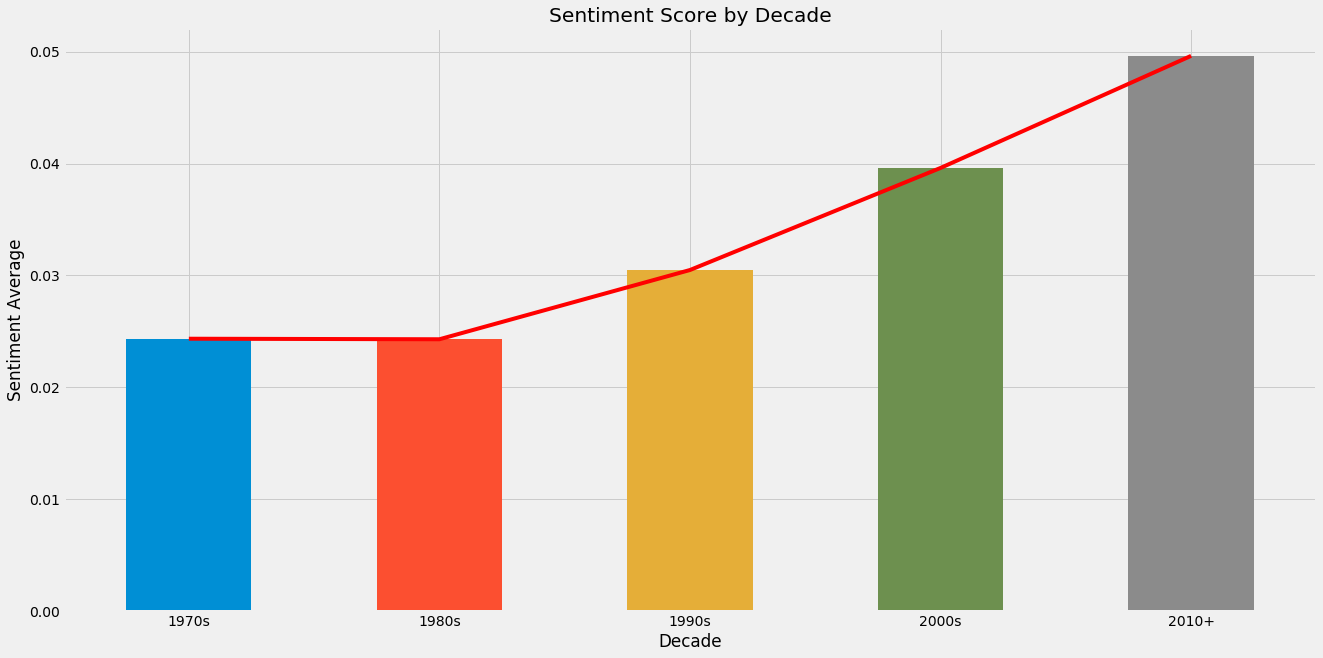

In [72]:
sentDecades.plot.bar(x='decade',y='sentiment')
sentDecades.plot(x='decade',y='sentiment',c='red')
plt.xlabel('Decade')
plt.ylabel('Sentiment Average')
plt.title('Sentiment Score by Decade');

### Sentiment By Story

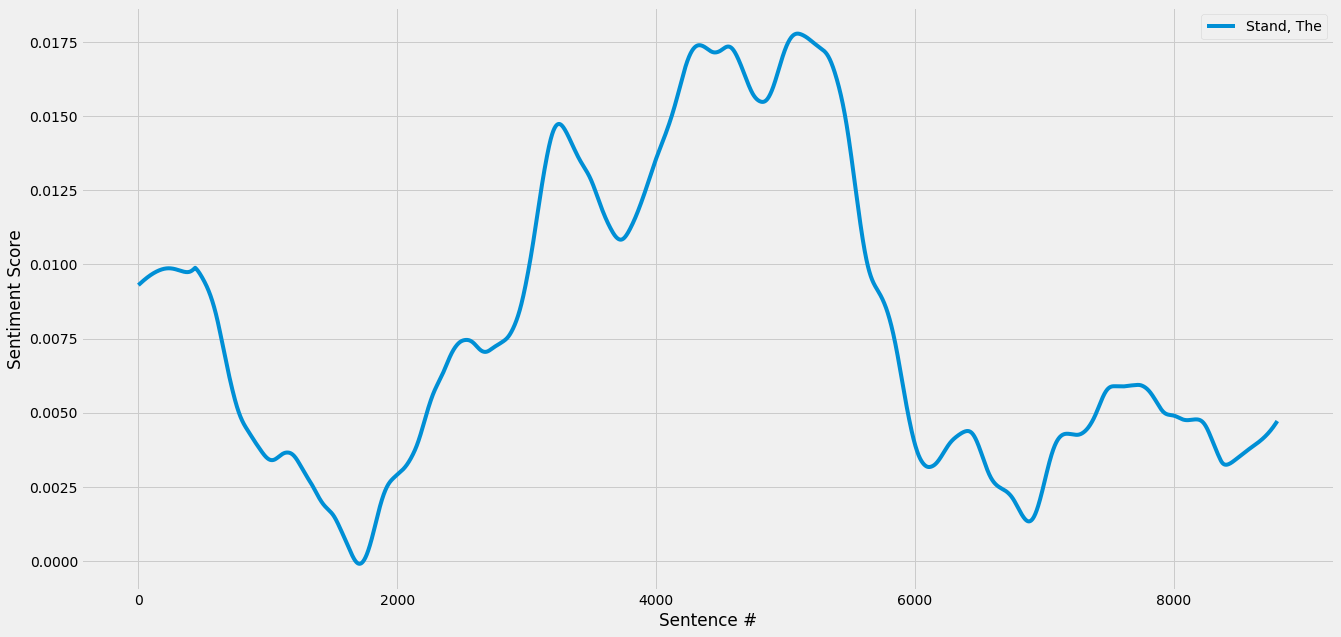

In [73]:
plot_story('Stand, The',sentDF)

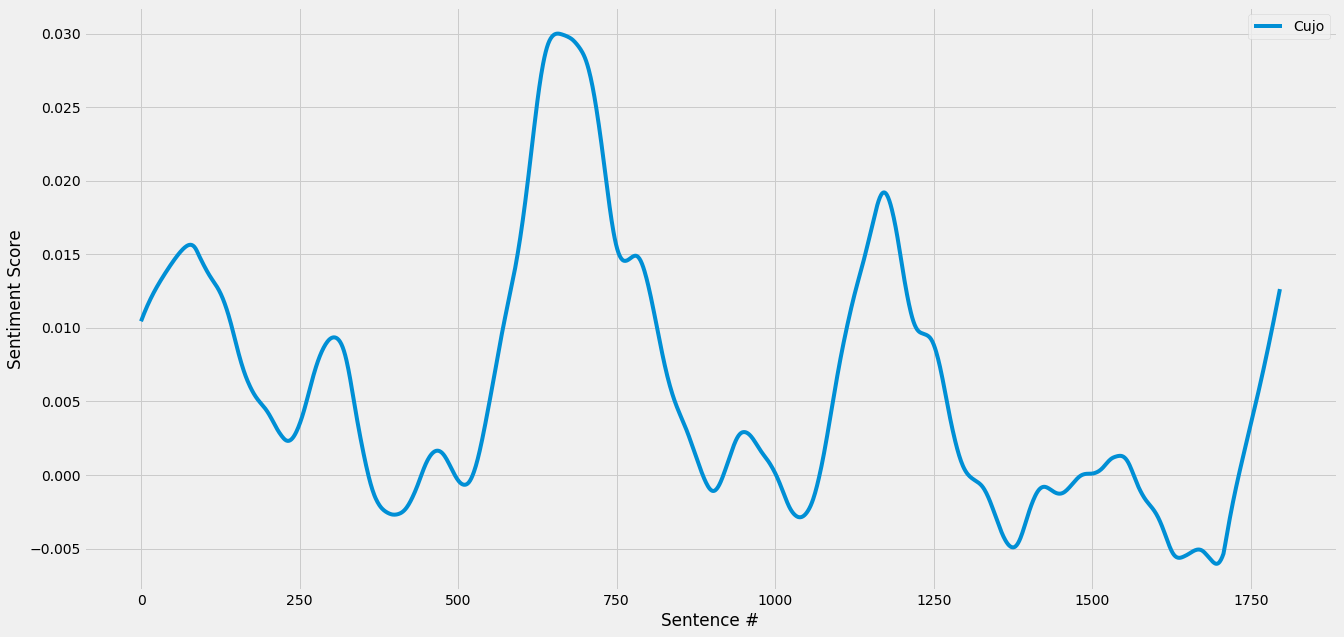

In [74]:
plot_story('Cujo',sentDF)